In [2]:
using DataFrames
using CSV
using LinearAlgebra
using Statistics
using Plots
include("linreg.jl")
path = "C:\\Users\\singh\\Downloads\\usconsumption.csv"
df = CSV.read(path, DataFrame)

Row,Quarter,Percent Change Consumption,Percent Change Income,Percent Change Production,Percent Change Savings,Change Unemployment
,String7,Float64,Float64,Float64,Float64,Float64
1,1960Q1,0.947824,1.1825,5.85456,3.18329,0.1
2,1960Q2,1.26048,0.625615,-2.19366,-4.81376,0.0
3,1960Q3,-0.400781,0.176703,-1.65811,5.3346,0.1
4,1960Q4,0.126736,-0.0418225,-2.44019,-1.30721,1.1
5,1961Q1,-0.0263901,0.966727,-1.52552,9.2915,0.3
6,1961Q2,1.47763,1.51217,3.88804,2.13531,0.0
7,1961Q3,0.48773,1.31975,3.14082,8.11255,-0.2
8,1961Q4,1.98331,1.91022,3.44642,1.50379,-0.7
9,1962Q1,1.05997,0.952471,1.48278,0.637622,-0.4


In [3]:
#Section 2 - Problem 1

df = hcat(ones(size(df, 1)), df)

Row,x1,Quarter,Percent Change Consumption,Percent Change Income,Percent Change Production,Percent Change Savings,Change Unemployment
,Float64,String7,Float64,Float64,Float64,Float64,Float64
1,1.0,1960Q1,0.947824,1.1825,5.85456,3.18329,0.1
2,1.0,1960Q2,1.26048,0.625615,-2.19366,-4.81376,0.0
3,1.0,1960Q3,-0.400781,0.176703,-1.65811,5.3346,0.1
4,1.0,1960Q4,0.126736,-0.0418225,-2.44019,-1.30721,1.1
5,1.0,1961Q1,-0.0263901,0.966727,-1.52552,9.2915,0.3
6,1.0,1961Q2,1.47763,1.51217,3.88804,2.13531,0.0
7,1.0,1961Q3,0.48773,1.31975,3.14082,8.11255,-0.2
8,1.0,1961Q4,1.98331,1.91022,3.44642,1.50379,-0.7
9,1.0,1962Q1,1.05997,0.952471,1.48278,0.637622,-0.4


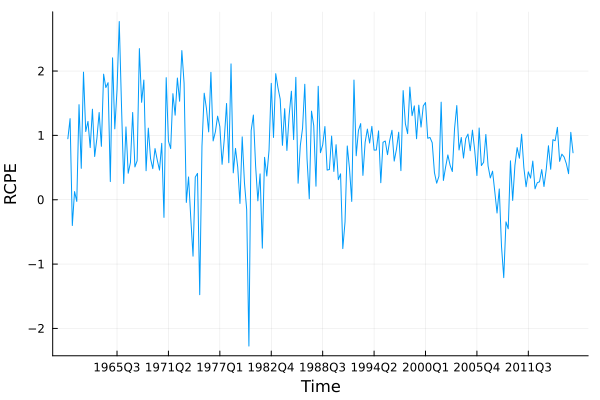

In [4]:
#Section 2 - Problem 2

rpce = df[:, " Percent Change Consumption"]
time = df.Quarter
plot(time, rpce, xlabel = "Time", ylabel = "RCPE", legend = false)

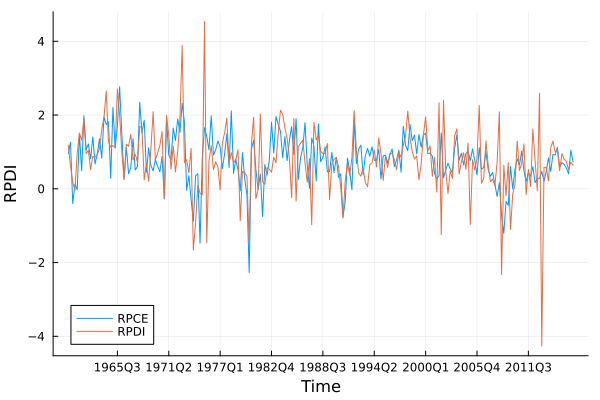

In [5]:
#Section 2 - Problem 3

rpce = df[:, " Percent Change Consumption"]
rpdi = df[:, "Percent Change Income"]
time = df.Quarter
plot(time, rpce, xlabel = "Time", ylabel = "RPCE", label = "RPCE")
plot!(time, rpdi, ylabel = "RPDI", label = "RPDI")

In [6]:
#Section 2 - Problem 4

X = df[:, ["Percent Change Income", "x1"]]
y = df[:, " Percent Change Consumption"]

X = Matrix(X)
y = vec(y)

θ = linreg(X, y, 0)

println("Intercept: $(θ[2])")
println("Weight for RPDI: $(θ[1])")

Intercept: 0.5518980112442429
Weight for RPDI: 0.32033937142880664


In [7]:
#Section 2 - Problem 5

X = df[:, ["Percent Change Income", "x1"]]
y = df[:, " Percent Change Consumption"]
X = Matrix(X)
y = vec(y)
θ = linreg(X, y, 0)

ŷ = predict(θ, X)

ymean = mean(y)

r2 = rsq(ŷ, y, ymean)

println("R^2: $(r2)")

R^2: 0.18287279977698911


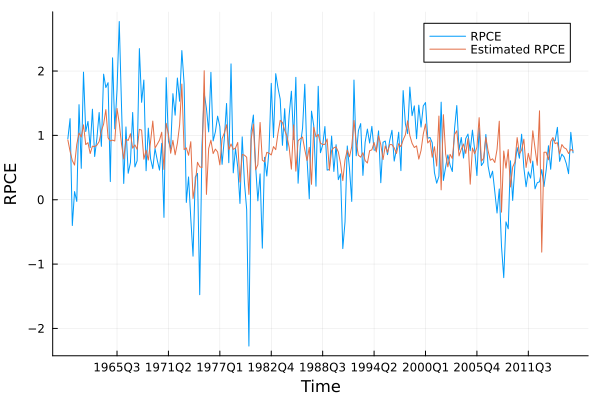

In [8]:
#Section 2 - Problem 6

X = df[:, ["Percent Change Income", "x1"]]
y = df[:, " Percent Change Consumption"]
X = Matrix(X)
y = vec(y)

θ = linreg(X, y, 0)

ŷ = predict(θ, X)

time = df.Quarter

plot(time, y, xlabel = "Time", ylabel = "RPCE", label = "RPCE")
plot!(time, ŷ, label = "Estimated RPCE")

In [9]:
#Section 2 - Problem 7

#modified linreg function to deal with BoundsError
function linreg(X::Matrix, y::Vector, λ::Real)
    n, p = size(X)
    X̃ = [ones(n) X]
    θ = (X̃'X̃ + λ*I)\(X̃'y)
    return θ
end

X = df[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]]
y = df[:, " Percent Change Consumption"]

X = Matrix(X)
y = vec(y)

θ = linreg(X, y, 0)

# print the weights
println("Intercept: $(θ[5])")
println("Weight for RPDI: $(θ[1])")
println("Weight for IP: $(θ[2])")
println("Weight for PS: $(θ[3])")
println("Weight for UR: $(θ[4])")

Intercept: -0.24245971511268447
Weight for RPDI: 0.25430229352367767
Weight for IP: 0.7537050372353791
Weight for PS: 0.03166918728313102
Weight for UR: -0.048975569814612006


In [10]:
#Section 2 - Problem 8

#R^2 value does improve. Went from 0.1828 (Q5) to 0.7609 (Q8)

include("linreg.jl")

X = Matrix(df[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
y = df[:, " Percent Change Consumption"]
X = [ones(size(X,1)) X]
y = vec(y)
θ = linreg(X, y, 0)

println("Weight for RPDI: $(θ[1])")
println("Weight for IP: $(θ[2])")
println("Weight for PS: $(θ[3])")
println("Weight for UR: $(θ[4])")
println("Intercept: $(θ[5])")

ŷ = predict(θ, X)

ymean = mean(y)

r2 = rsq(ŷ, y, ymean)

println("R^2: $(r2)")

Weight for RPDI: 0.25430229352367767
Weight for IP: 0.7537050372353791
Weight for PS: 0.03166918728313102
Weight for UR: -0.048975569814612006
Intercept: -0.24245971511268447


R^2: 0.7609760633486976


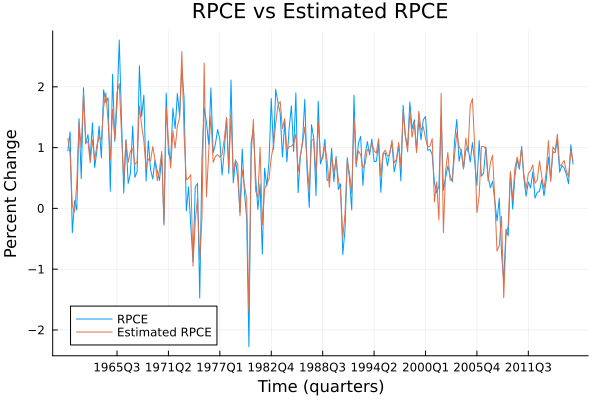

In [11]:
#Section 2 - Problem 9

X = Matrix(df[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
y = df[:, " Percent Change Consumption"]
X = [ones(size(X,1)) X]
y = vec(y)
θ = linreg(X, y, 0)
ŷ = predict(θ, X)

t = df[:, "Quarter"]
plot(t, df[:, " Percent Change Consumption"], label="RPCE")
plot!(t, ŷ, label="Estimated RPCE")
xlabel!("Time (quarters)")
ylabel!("Percent Change")
title!("RPCE vs Estimated RPCE")

In [12]:
#Section 2 - Problem 10

abs_weights = abs.(θ[2:end])

feature_dict = Dict(zip(["RPDI", "IP", "PS", "UR"], abs_weights))

sorted_dict = sort(feature_dict, by=x->x[2], rev=true)

println("Features by order of importance:")
for (feat, weight) in sorted_dict
    println("$feat: $(round(weight, digits=4))")
end

Features by order of importance:
PS: 0.049
UR: 0.2425
IP: 0.0317
RPDI: 0.7537


In [13]:
#Section 2 - Problem 11

#The trend in the R^2 value is the they decrease by a very small amount each time a λ is printed

λ_vals = [0, 0.001, 0.01, 0.1, 1]

for λ in λ_vals
    X = Matrix(df[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
    y = df[:, " Percent Change Consumption"]
    X = [ones(size(X,1)) X]
    y = vec(y)
    θ = linreg(X, y, λ)
    ŷ = predict(θ, X)
    
    ymean = mean(y)
    r2 = rsq(ŷ, y, ymean)
    
    println("λ=$(λ): R^2=$(r2)")
end


λ=0.0: R^2=0.7609760633486976
λ=0.001: R^2=0.7609760632606297
λ=0.01: R^2=0.7609760545482572
λ=0.1: R^2=0.7609751895886394
λ=1.0: R^2=0.7608944182343681


In [ ]:
#Section 2 - Problem 12

#=
This cell returns a R^2 value of 0.7441 which is similar to all the R^2 values found in Q8 (R^2 = 0.7609) 
and Q9 (λ=0.0: R^2=0.7609760633486976, λ=0.001: R^2=0.7609760632606297, λ=0.01: R^2=0.7609760545482572,
λ=0.1: R^2=0.7609751895886394, λ=1.0: R^2=0.7608944182343681)
=#

train_range = 1:((2010-1960)*4+4)
test_range = ((2016-2011)*4+5):size(df,1)
X_train = Matrix(df[train_range, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
X_train = [ones(size(X_train,1)) X_train]
y_train = vec(df[train_range, " Percent Change Consumption"])
X_test = Matrix(df[test_range, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
X_test = [ones(size(X_test,1)) X_test]
y_test = vec(df[test_range, " Percent Change Consumption"])

θ = linreg(X_train, y_train, 0)

ŷ_test = predict(θ, X_test)
ymean_test = mean(y_test)
r2_test = rsq(ŷ_test, y_test, ymean_test)
println("R^2 for test set: $(r2_test)")

In [ ]:
#Section 2 - Problem 13

#=
The first output gave a R^2 for the sequential model predictions of -9.64671475814331. This value is negative,
which implies that the predictions made by the sequential models are worse than just using the mean value of the test set
as a prediction.
The secound output gave a R^2 for the training set of 0.760983077377533. This means that the model explains around 76% of
the variance in the training set.
The third output gave a R^2 for the test set of 0.4653664452235109. Here, the model explains around 46% of the variance
in the test set.
Therefore, it can be said that the R^2 value does improve slightly over Q12 as the trainset set R^2 value is similar to the
values found in the earlier questions.
=#

#modified linreg function
function linreg(X::Matrix, y::Vector, λ::Real)
    n, p = size(X)
    θ = (X'X + λ*I)\(X'y)
    return θ
end

train = df[df[:, "Quarter"] .<= "2010Q4", :]
test = df[df[:, "Quarter"] .> "2010Q4", :]

X_train = Matrix(train[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
y_train = vec(train[:, " Percent Change Consumption"])
X_test = Matrix(test[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
y_test = vec(test[:, " Percent Change Consumption"])

X_train = [ones(size(X_train, 1)) X_train]
X_test = [ones(size(X_test, 1)) X_test]

y_pred = zeros(length(y_test))

for i in 1:length(y_test)
    X_train_i = X_train[1:(i-1), :]
    y_train_i = y_train[1:(i-1)]
    θ_i = linreg(X_train_i, y_train_i, 0.01)
    
    y_pred[i] = dot(X_test[i, :], θ_i)
end

ymean_test = mean(y_test)
r2_test = rsq(y_pred, y_test, ymean_test)
println("R^2 for sequential model predictions: $(r2_test)")

θ_train = linreg(X_train, y_train, 0)
y_pred_train = X_train * θ_train
ymean_train = mean(y_train)
r2_train = rsq(y_pred_train, y_train, ymean_train)

y_pred_test = X_test * θ_train
ymean_test = mean(y_test)
r2_test = rsq(y_pred_test, y_test, ymean_test)

println("R^2 for training set: $(r2_train)")
println("R^2 for test set: $(r2_test)")

In [ ]:
#Section 2 - Problem 14

#=
This cell returns a R^2 for AR(1) model predictions of -93.09787052698975. This means that the model does not
fit the data well.The case may be that the AR(1) model is overfitting with respect to the training data and not 
generalzing well enough to the test data.
=#

# divide data into training and test sets
train = df[df[:, "Quarter"] .<= "2010Q4", :]
test = df[df[:, "Quarter"] .> "2010Q4", :]

# extract input and output variables
X_train = Matrix(train[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
y_train = vec(train[:, " Percent Change Consumption"])
X_test = Matrix(test[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
y_test = vec(test[:, " Percent Change Consumption"])

# add intercept to input variables
X_train = [ones(size(X_train, 1)) X_train]
X_test = [ones(size(X_test, 1)) X_test]

# initialize array to store predictions
y_pred = zeros(length(y_test))

# loop over test set quarters
for i in 1:length(y_test)
    # fit AR(1) model to training data up to this quarter
    if i == 1
        X_train_i = X_train[1:(i-1), :]
        y_train_i = y_train[1:(i-1)]
        θ_i = linreg(X_train_i, y_train_i, 0.01)
        y_t_1 = 0.0
    else
        X_train_i = X_train[1:(i-1), :]
        y_train_i = y_train[2:i]
        θ_i = linreg(X_train_i, y_train_i, 0.01)
        y_t_1 = y_train[i-1]
    end
    
    # make prediction for this quarter using the fitted model
    y_pred[i] = dot(X_test[i, :], θ_i) + y_t_1
end

# compute R^2 value for predictions
ymean_test = mean(y_test)
r2_test = rsq(y_pred, y_test, ymean_test)
println("R^2 for AR(1) model predictions: $(r2_test)")

In [ ]:
#Section 2 - Problem 15

train = df[df[:, "Quarter"] .<= "2010Q4", :]
test = df[df[:, "Quarter"] .> "2010Q4", :]

X_train = Matrix(train[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
y_train = vec(train[:, " Percent Change Consumption"])
X_test = Matrix(test[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
y_test = vec(test[:, " Percent Change Consumption"])

X_train = [ones(size(X_train, 1)) X_train]
X_test = [ones(size(X_test, 1)) X_test]

y_pred = zeros(length(y_test))

θ_prev = zeros(size(X_train, 2))

for i in 1:length(y_test)
    X_train_i = X_train[1:(i-1), :]
    y_train_i = y_train[1:(i-1)]
    if i == 1
        θ_i = linreg(X_train_i, y_train_i, 0.01)
    else
        θ_i = update(X_train_i, y_train_i, θ_prev, 0.01)
    end
    
    y_pred[i] = dot(X_test[i, :], θ_i)
    θ_prev = θ_i
end

ymean_test = mean(y_test)
r2_test = rsq(y_pred, y_test, ymean_test)
println("R^2 with update: $(r2_test)")

#without update code below

train = df[df[:, "Quarter"] .<= "2010Q4", :]
test = df[df[:, "Quarter"] .> "2010Q4", :]

X_train = Matrix(train[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
y_train = vec(train[:, " Percent Change Consumption"])
X_test = Matrix(test[:, ["Percent Change Income", " Percent Change Production", " Percent Change Savings", " Change Unemployment"]])
y_test = vec(test[:, " Percent Change Consumption"])

X_train = [ones(size(X_train, 1)) X_train]
X_test = [ones(size(X_test, 1)) X_test]

y_pred = zeros(length(y_test))

for i in 1:length(y_test)
    if i == 1
        X_train_i = X_train[1:(i-1), :]
        y_train_i = y_train[1:(i-1)]
        θ_i = linreg(X_train_i, y_train_i, 0.01)
        y_t_1 = 0.0
    else
        X_train_i = X_train[1:(i-1), :]
        y_train_i = y_train[2:i]
        θ_i = linreg(X_train_i, y_train_i, 0.01)
        y_t_1 = y_train[i-1]
    end
    
    y_pred[i] = dot(X_test[i, :], θ_i) + y_t_1
end

ymean_test = mean(y_test)
r2_test = rsq(y_pred, y_test, ymean_test)
println("R^2 without update: $(r2_test)")